In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os

from table_utils import *
from matplotlib_chart import *

%reload_ext table_utils
%reload_ext autoreload

benchmark_dir = "../benchmarks"

def values_to_colors(values):
    distinct_vals = list(set(values))
    cmap = matplotlib.cm.viridis
    colors = cmap(np.linspace(0, 1, len(distinct_vals)))
    return [colors[distinct_vals.index(x)] for x in values]

def load_input_table(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        input_data = benchmark["input_data"]
        df = pd.DataFrame.from_records(input_data)
        df = load_and_clean_table(df, return_as_df=True)
        return df

[BarH(x1=0, x2=0.35, y=0.0, color='Agree', column=None),
 BarH(x1=0.35, x2=0.43, y=0.0, color='Disagree', column=None),
 BarH(x1=0.43, x2=0.9299999999999999, y=0.0, color='Strongly Agree', column=None),
 BarH(x1=0.9299999999999999, x2=1.0, y=0.0, color='Strongly Disagree', column=None),
 BarH(x1=0, x2=0.1, y=1.0, color='Agree', column=None),
 BarH(x1=0.1, x2=0.2, y=1.0, color='Disagree', column=None),
 BarH(x1=0.2, x2=0.8999999999999999, y=1.0, color='Strongly Agree', column=None),
 BarH(x1=0.8999999999999999, x2=0.9999999999999999, y=1.0, color='Strongly Disagree', column=None),
 BarH(x1=0, x2=0.3, y=2.0, color='Agree', column=None),
 BarH(x1=0.3, x2=0.44999999999999996, y=2.0, color='Disagree', column=None),
 BarH(x1=0.44999999999999996, x2=0.8999999999999999, y=2.0, color='Strongly Agree', column=None),
 BarH(x1=0.8999999999999999, x2=0.9999999999999999, y=2.0, color='Strongly Disagree', column=None)]


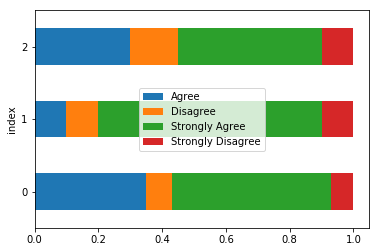

In [2]:
df = load_input_table("007.json")
df["index"] = df.index
#df.plot(kind="barh",x="index", y=["Agree", "Disagree", "Strongly Agree", "Strongly Disagree"], stacked=True)

chart = MatplotlibChart(
            df, 
            GroupBarChart("index", ["Agree", "Disagree", 
                                    "Strongly Agree", 
                                    "Strongly Disagree"], 
                          stacked=True, orient="horizontal"))
pprint(chart.eval())
chart.render()

      Class  Fall  Spring
0  Literacy    34      69
1  Language    63      77
2      Math    67      75
3   Science    92      98
4      Arts    96     100
[Point(shape='point', x='Literacy', y=34, size=None, color='Fall', column=None),
 Point(shape='point', x='Literacy', y=69, size=None, color='Spring', column=None),
 Point(shape='point', x='Language', y=63, size=None, color='Fall', column=None),
 Point(shape='point', x='Language', y=77, size=None, color='Spring', column=None),
 Point(shape='point', x='Math', y=67, size=None, color='Fall', column=None),
 Point(shape='point', x='Math', y=75, size=None, color='Spring', column=None),
 Point(shape='point', x='Science', y=92, size=None, color='Fall', column=None),
 Point(shape='point', x='Science', y=98, size=None, color='Spring', column=None),
 Point(shape='point', x='Arts', y=96, size=None, color='Fall', column=None),
 Point(shape='point', x='Arts', y=100, size=None, color='Spring', column=None)]


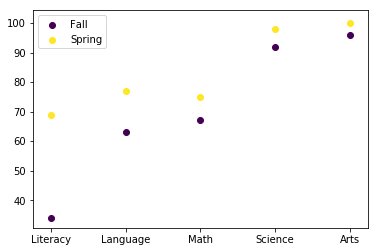

In [3]:
df = load_input_table("010.json")
print(df)
# plt.scatter(y=df["Class"],x=df["Fall"], label="Fall")
# plt.scatter(y=df["Class"],x=df["Spring"], label="Spring")
# plt.legend()
# plt.show()

chart = MatplotlibChart(df, ScatterPlot(c_x="Class", c_ys=["Fall", "Spring"]))
pprint(chart.eval())
chart.render()


    Month  Net Cash Flow  index  Net Cash Flow Sum       c      d
0   Start          80000      0              80000       0  False
1     Apr          -5003      1              74997   80000   True
2     May         -16700      2              58297   74997   True
3     Jun          48802      3             107099   58297  False
4     Jul         -11198      4              95901  107099   True
5     Aug         -35260      5              60641   95901   True
6     Sep          18220      6              78861   60641  False
7     Oct         -23840      7              55021   78861   True
8     Nov          43250      8              98271   55021  False
9     Dec         -18280      9              79991   98271   True
10    Jan          26670     10             106661   79991  False
11    Feb          15000     11             121661  106661  False
12    Mar          24750     12             146411  121661  False
[BarV(x=0, y1=0, y2=80000, color=False, column=None),
 BarV(x=1, y1=80000, y

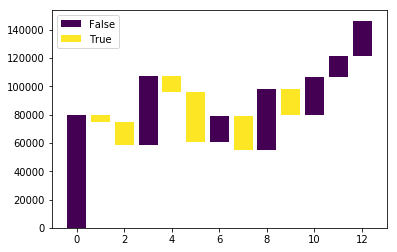

In [4]:
df = load_input_table("003.json")
df["index"] = df.index
tmp = df["Net Cash Flow"].cumsum()
df = df.join(tmp, lsuffix='', rsuffix=' Sum')
df = df.assign(c=df["Net Cash Flow Sum"]-df["Net Cash Flow"])
df = df.assign(d=df["c"]>df["Net Cash Flow Sum"])

print(df)

chart = MatplotlibChart(df, BarChart(c_x="index", c_height="Net Cash Flow", c_bot="c", c_color="d"))

pprint(chart.eval())
chart.render()

#plt.bar(x=df["Month"], height=df["Net Cash Flow"], bottom=df["c"], color=values_to_colors(df["d"]))

    Duration  End of Shift  Period  Shift Start of Shift    s0    s1
0         60  1:50 / 18:10       1      1   0:50 / 19:10    50   110
1         48  4:32 / 15:28       1      2   3:44 / 16:16   224   272
2         40  6:59 / 13:01       1      3   6:19 / 13:41   379   419
3         56  10:01 / 9:59       1      4   9:05 / 10:55   545   601
4         81  14:00 / 6:00       1      5   12:39 / 7:21   759   840
5         48  16:54 / 3:06       1      6   16:06 / 3:54   966  1014
6         62  19:06 / 0:54       1      7   18:04 / 1:56  1084  1146
7         60  1:00 / 19:00       2      8   0:00 / 20:00     0    60
8         88  4:05 / 15:55       2      9   2:37 / 17:23   157   245
9         46  10:04 / 9:56       2     10   9:18 / 10:42   558   604
10        66  12:47 / 7:13       2     11   11:41 / 8:19   701   767
11        83  15:13 / 4:47       2     12   13:50 / 6:10   830   913
12        83  19:00 / 1:00       2     13   17:37 / 2:23  1057  1140
13        37  1:16 / 18:44       3

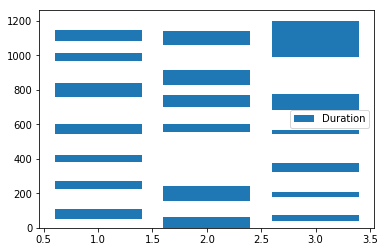

In [5]:
df = load_input_table("015.json")

split_col = df["End of Shift"].str.split("/", expand=True)
df["s1"] = split_col[0]
split_col = df["Start of Shift"].str.split("/", expand=True)
df["s0"] = split_col[0]

df = pd.DataFrame.from_records(load_and_clean_table(df))

print(df)
chart = MatplotlibChart(df, BarChart(c_x="Period", c_height="Duration", c_bot="s0"))
pprint(chart.eval())
chart.render()

#plt.bar(x=df["Period"], height=df["Duration"], bottom=df["s0"])

Item variable  Desktop Computers  Laptops  Monitors  Printers
0        2012                 20       34        12        78
1        2013                 12       45        10        13
2        2014                 13       40        17        90
3        2015                 12       39        15        14


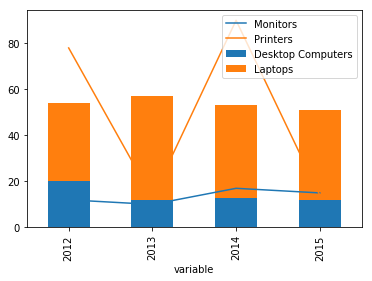

In [6]:
df = load_input_table("018.json")

df = pd.melt(df, id_vars='Item', value_vars=["2012", "2013", "2014", "2015"])
df = df.pivot_table(index="variable", columns="Item", values=['value'])
df.columns = df.columns.droplevel(0)
df = df.reset_index()

print(df)
fig, ax = plt.subplots()
for col in ["Monitors", "Printers"]:
    ax.plot(df["variable"], df[col], label=col)
df.plot.bar(x="variable", y=["Desktop Computers", "Laptops"], stacked=True, ax=ax)
ax.legend()

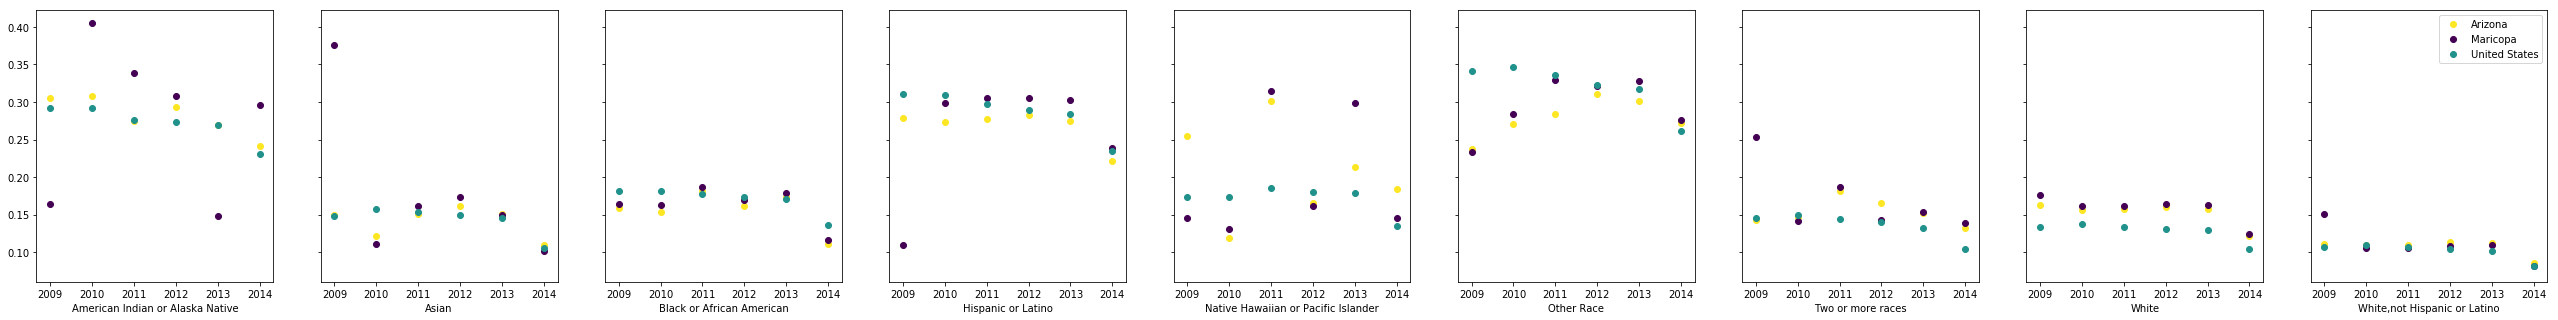

In [7]:
df = load_input_table("009.json")
df = pd.melt(df, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])
df = df.pivot_table(index=["variable", "Rae"], columns="Location", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

# group = df["Rae"]
# num_group = len(np.unique(group))
# fig, axes = plt.subplots(1,num_group,figsize=(num_group * 5,5))
# for ax,g in zip(axes, np.unique(group)):
#     i = np.where(group == g)
#     sub_df = df.loc[i]
#     for col in ["Arizona", "Maricopa", "United States"]:
#         ax.scatter(x=sub_df["variable"], y=sub_df[col], label=col)
#         ax.set_xlabel(g)
#         ax.set_ylabel("variable")
# plt.legend()
# plt.show()

#print(df)
chart = MatplotlibChart(df, Subplot(
            chart=ScatterPlot(c_x="variable", c_ys=["Arizona", "Maricopa", "United States"]),
            column="Rae"))
#pprint(chart.eval())
chart.render()


         variable        C2    Q1    Q2    Q3
0            APAC   Adopted  0.38  0.27  0.59
1            APAC   Engaged  0.47  0.37  0.75
2            APAC   Pitched  0.45  0.35  0.74
3            APAC  Targeted  0.48  0.39  0.87
4            EMEA   Adopted  0.52  0.42  0.62
5            EMEA   Engaged  0.65  0.54  0.78
6            EMEA   Pitched  0.59  0.50  0.72
7            EMEA  Targeted  0.66  0.56  0.91
8           LATAM   Adopted  0.31  0.26  0.53
9           LATAM   Engaged  0.48  0.41  0.80
10          LATAM   Pitched  0.44  0.37  0.73
11          LATAM  Targeted  0.48  0.43  0.95
12  North America   Adopted  0.36  0.31  0.40
13  North America   Engaged  0.52  0.43  0.55
14  North America   Pitched  0.45  0.39  0.50
15  North America  Targeted  0.56  0.50  0.70


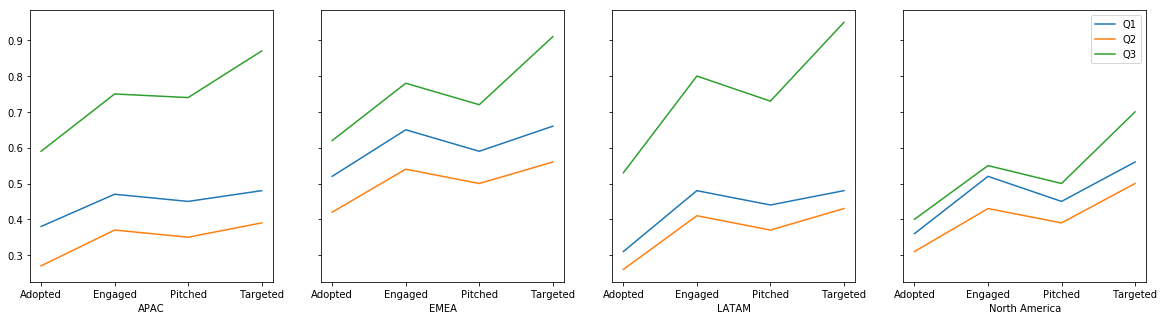

In [8]:
df = load_input_table("012.json")
df = pd.melt(df, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North America", "APAC"])
df = df.pivot_table(index=["variable", "C2"], columns="C1", values=['value']).reset_index()
df.columns = [col[-1] if col[-1] != "" else col[0] for col in df.columns.values]

print(df)

group = df["variable"]
num_group = len(np.unique(group))
fig, axes = plt.subplots(1,num_group,figsize=(num_group * 5,5),sharex=True, sharey=True)
for ax,g in zip(axes, np.unique(group)):
    i = np.where(group == g)
    sub_df = df.loc[i]
    for col in ["Q1", "Q2", "Q3"]:
        ax.plot(sub_df["C2"], sub_df[col], label=col)
        ax.set_xlabel(g)
plt.legend()
plt.show()

   Totals Value  alpha  beta  gamma
0       7     A      2     2      3
1       8     B      2     3      3
2       9     C      3     3      3
3       9     D      3     4      2
4       9     E      4     3      2


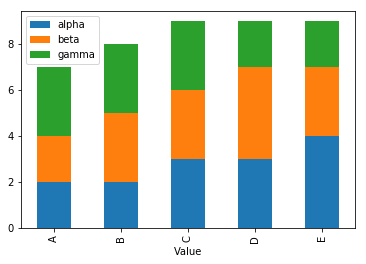

In [9]:
df = load_input_table("013.json")

chart = MatplotlibChart(df, GroupBarChart("Value", ["alpha", "beta", "gamma"], stacked=True))

#df.plot(kind="bar", x="Value", y=["alpha", "beta", "gamma"], stacked=True)
chart.render()

    Duration  End of Shift  Period  Shift Start of Shift    s0    s1
0         60  1:50 / 18:10       1      1   0:50 / 19:10    50   110
1         48  4:32 / 15:28       1      2   3:44 / 16:16   224   272
2         40  6:59 / 13:01       1      3   6:19 / 13:41   379   419
3         56  10:01 / 9:59       1      4   9:05 / 10:55   545   601
4         81  14:00 / 6:00       1      5   12:39 / 7:21   759   840
5         48  16:54 / 3:06       1      6   16:06 / 3:54   966  1014
6         62  19:06 / 0:54       1      7   18:04 / 1:56  1084  1146
7         60  1:00 / 19:00       2      8   0:00 / 20:00     0    60
8         88  4:05 / 15:55       2      9   2:37 / 17:23   157   245
9         46  10:04 / 9:56       2     10   9:18 / 10:42   558   604
10        66  12:47 / 7:13       2     11   11:41 / 8:19   701   767
11        83  15:13 / 4:47       2     12   13:50 / 6:10   830   913
12        83  19:00 / 1:00       2     13   17:37 / 2:23  1057  1140
13        37  1:16 / 18:44       3

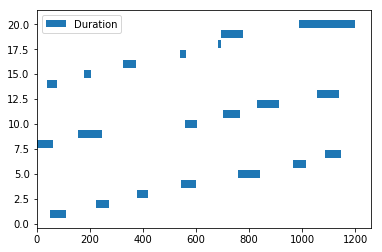

In [10]:
df = load_input_table("014.json")

split_col = df["End of Shift"].str.split("/", expand=True)
df["s1"] = split_col[0]
split_col = df["Start of Shift"].str.split("/", expand=True)
df["s0"] = split_col[0]

df = pd.DataFrame.from_records(load_and_clean_table(df))

print(df)
chart = MatplotlibChart(df, BarChart(c_x="Shift", c_height="Duration", c_bot="s0", orient="horizontal"))
pprint(chart.eval())
chart.render()

#plt.barh(y=df["Shift"], width=df["Duration"], left=df["s0"])